<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 2</h2>

In [ ]:
# Student names and numbers:


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For most of the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [6]:
# Import all necessary libraries here
import pandas as pd
import numpy as np

# Exercise 1: Sentiment analysis

In this exercise we use the IMDB-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [19]:


reviews = pd.read_csv('IMDB_dataset/reviews.txt', header=None)
labels = pd.read_csv('IMDB_dataset/labels.txt', header=None)
Y = (labels == 'positive').astype(np.int_)

print(reviews[0:1])
print(Y[0:1])

                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
   0
0  1


**a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing.


In [30]:

train_reviews, validate_reviews, test_reviews = np.split(reviews.sample(frac=1),
                                                         [int(.6 * len(reviews)), int(.8 * len(reviews))])
print(len(train_reviews))
print(len(validate_reviews))
print(len(test_reviews))

train_labels, validate_labels, test_labels = np.split(labels.sample(frac=1),
                                                      [int(.6 * len(labels)), int(.8 * len(labels))])
print(len(train_labels))
print(len(validate_labels))
print(len(test_labels))

                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...
5  this film lacked something i couldn  t put my ...
6  this is easily the most underrated film inn th...
7  sorry everyone    i know this is supposed to b...
8  this is not the typical mel brooks film . it w...
9  when i was little my parents took me along to ...
          0
0  positive
1  negative
2  positive
3  negative
4  positive
5  negative
6  positive
7  negative
8  positive
9  negative
15000
5000
5000
15000
5000
5000


**b)** Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. (See an example of how to do this in chapter 7 of "Muller and Guido"). Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


**c)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**d)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**e)** Test your sentiment-classifier on the test set.

**h)** Use the classifier to classify a few sentences you write yourselves. 

# Exercise 2: MNIST

In this exercise, we consider the famous MNIST dataset, which is loaded below. The dataset consists of 70000 handwritten digits 0-9 at a resolution of 28x28 pixels. In the cell below, the dataset is loaded and split into 60000 traning and 10000 testing images. 

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


The code-snippet below can be used to see the images corresponding to individual digits:

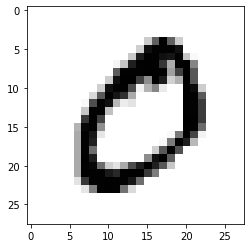

In [7]:
import matplotlib.pyplot as plt

index = 1

plt.imshow(x_train[index], cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

In [ ]:
import numpy as np

digit0 = 3
digit1 = 7
x_bin_train = x_train[np.logical_or(y_train == digit0, y_train == digit1)]
y_bin_train = y_train[np.logical_or(y_train == digit0, y_train == digit1)]

x_bin_test = x_test[np.logical_or(y_test == digit0, y_test == digit1)]
y_bin_test = y_test[np.logical_or(y_test == digit0, y_test == digit1)]

print("The first training datapoint now is: \n")
plt.imshow(x_bin_train[0], cmap=plt.cm.gray_r)
plt.show()
print(y_bin_train[0])

### Training a neural network

**a)** Learn different neural network models by varying the network architecture (i.e. number of layers and neurons in each layer) and the type of network (i.e. fully connected vs. convolutional). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

**b)** Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? (Hint: you can e.g. use the numpy where() function to extract the indices of the test cases that were misclassified: `misclass = np.where(test != predictions)` )

**c)** How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

**d)** Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

### Cheating

We next investigate the capability of the neural networks to find a good model, knowing that a very accurate model exists. For this, we add some 'cheat info' to our data: we replace the first pixel value in the data matrix by a digit that simply contains a 0/1 encoding of the actual class label: 

In [ ]:
#adding cheating information to the training data:
cheatcol_train = np.array(y_bin_train)  #making a copy of the original target array
cheatcol_train[cheatcol_train == digit0] = 0  #re-coding the two classes as 0s and 1s
cheatcol_train[cheatcol_train == digit1] = 1
x_bin_cheat_train = np.copy(x_bin_train)
x_bin_cheat_train[:, 0, 0] = cheatcol_train.reshape(len(cheatcol_train))

#adding cheating information to the testing data:
cheatcol_test = np.array(y_bin_test)  #making a copy of the original target array
cheatcol_test[cheatcol_test == digit0] = 0  #re-coding the two classes as 0s and 1s
cheatcol_test[cheatcol_test == digit1] = 1
x_bin_cheat_test = np.copy(x_bin_test)
x_bin_cheat_test[:, 0, 0] = cheatcol_test.reshape(len(cheatcol_test))

The neural networks should, in principle, be able to construct a 100% accurate classifier for this data: we only have to 'learn' that only the first pixel in the data matters. 

**e)** Describe, briefly, how the weights of a (fully connected) network (with arbitrary number of layers) would have to be set, so that the resulting model is 100% accurate on this cheating data. This part of the exercise does not involve any Python code. Just give your answer in a short text.

**f)** Investigate how the accuracy improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why?

# Exercise 3 - Data preparation, exploration and feature engineering

In this exercise, you are going to investigate student dropout based on the dataset "churn2000.cvs". This is a real dataset, and there is no single "correct" way to use it (however, there are several wrong ones!). Your exercise is to explore one or more possible usecases, and document the one(s) you find the most fruitful/interesting.  Your work should probably include the steps below:

- An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations? Are there problematic features or rows in the dataset? 
- Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).
- Normalize/bin/create dummy variables where relevant. 
- Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment (e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")
- Train a neural network and at least one other algorithm on the data. Find a good set of hyperparameters for each model. Do you think a neural network is suitable for this kind of problem? Why/why not?
- What features seem to be important for predicting whether a student is likely to drop out?

Warning: Make sure you carefully consider what information is available at the time where a prediction is to be made - for example, it doesn't make any sense to try to predict if a student churns in semester 1, if you include a feature which tells that this student churned in semester 2!  So depending on your specific usecase, you should probably remove some columns and/or rows before you train your model.

### An investigation of the data, using e.g. FACETs, Pandas, and/or whatever other tools you prefer. Can you find any interesting correlations?

- Assumed correlations:
    - Whether a student was getting SU in the "SU_clips_used" column could affect whether they 'churned out' or not.
    - If the column "Status" has a value of "terminated", the column value of "CHURNED_ALL" is always "1" 
    - If the column "Status" has a value of "completed", the column value of "CHURNED_ALL" is always "0" 
    - Column "Passed_ects_SEM1" should be corelated to the column "CHURNED_IN_SEM1"
    - Different universities could have an effect on the "CHURNED_ALL"

### What features seem to be important for predicting whether a student is likely to drop out?

- Correlations according to the plot:
    - The highest correlation is between "CHURNED_AFTER_SEM1" and "CHURNED_ALL"
    - There is a high correlation between "CHURNED_AFTER_SEM2" and "CHURNED_ALL"
    - There is a high correlation between "CHURNED_AFTER_SEM1" and "CHURNED_AFTER_SEM2"
    - There is an unexpected correlation between "CHURNED_IN_SEM1" and "Years_since_exam"
    - There is a decent correlation between "CHURNED_AFTER_SEM1" and "CHURNED_IN_SEM2" 

Text(0.5, 1.0, 'Correlation Matrix')

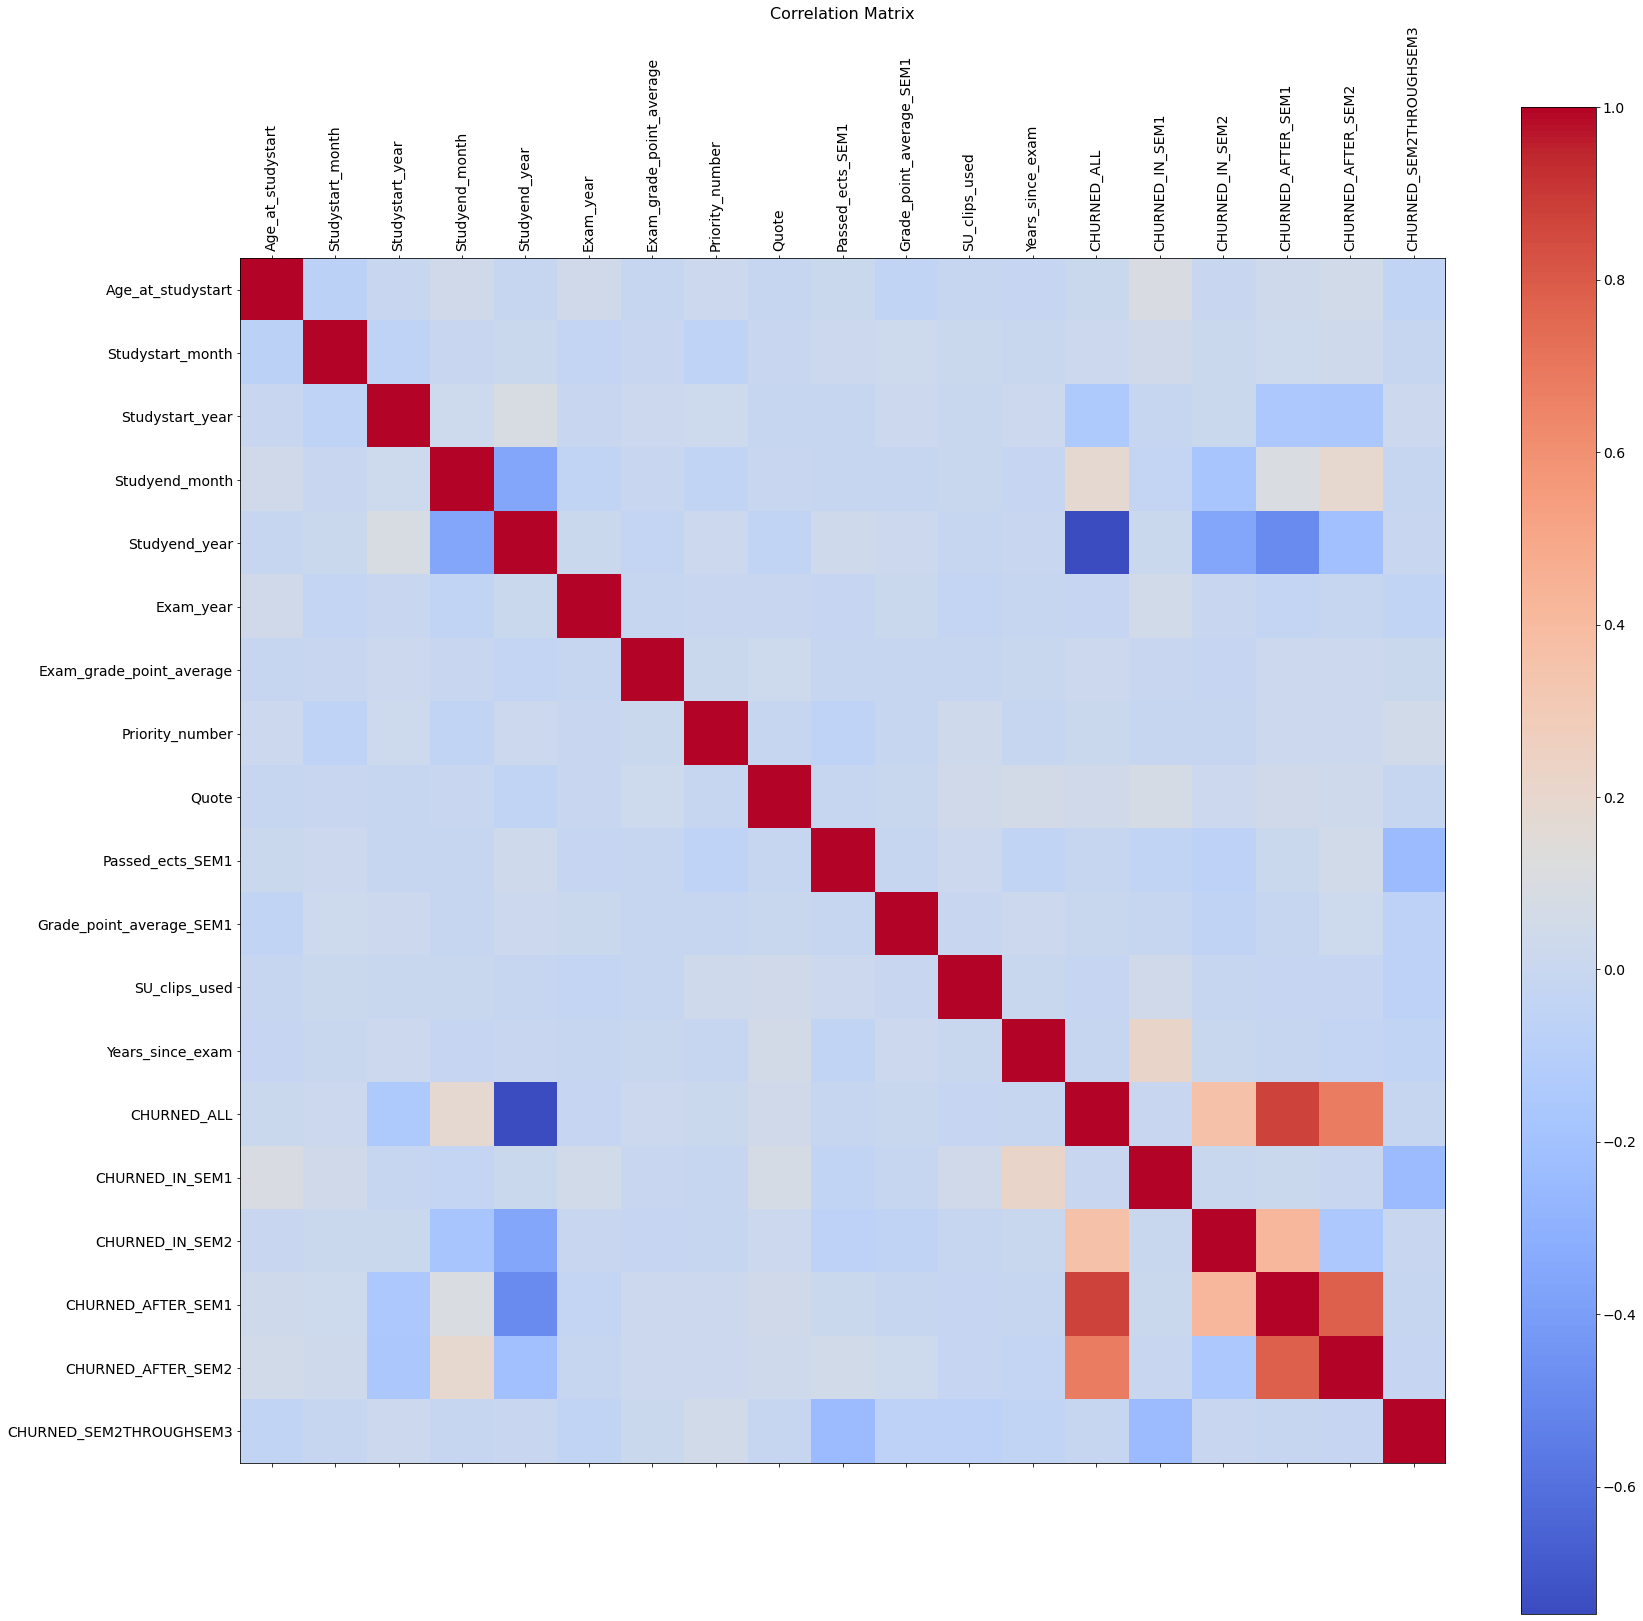

In [32]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('churn.csv')

# Plot creation
f = plt.figure(figsize=(27, 27))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.set_cmap('coolwarm')
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Are there problematic features or rows in the dataset?

- "Exam_year" and "Years_since_exam" are both problematic because, in many cases the difference doesn't match or the student is younger than the years since exam (ex.: ~20 year old student with a value in the column "Exam_year" of 1900)

- The "Study_start_date" doesn't always match with the "Studystart_month" and "Studystart_year"

- Any column with text values is problematic since it can't be objectively evaluated by the models

- Different grading scales which affect the grading average are also problematic

- The "SU_clips_used" column has multiple rows with null values

- One row has a null value in column "Age_at_studystart"

### Handle missing data and possible outliers (in each case, consider what you want to do: Remove row? Remove column? Insert custom value?).

### Normalize/bin/create dummy variables where relevant. 

- First of all we need to remove the column "CHURNED_ALL" since as can be seen by our usecase it has a direct correlation with the column "Status" which we are using as a target variable

- Following this, since status contains the values "open" and "orlov" it is inconclusive whether the student will drop out or not. Therefore we decided to remove the rows containing these values.

- We also removed all columns containing text values except "Status" and "University_institute" for which we created dummies

- We changed null values inside the column "SU_clips_used" to 0 

- We removed the columns "Studyend_month" and "Studyend_year" because if a student dropped out these are always null

- As mentioned before "Exam_year" and "Years_since_exam" are irregular and therefore removed

- We were unable to decipher the meaning of the columns "Quote" and "Priority_number" therefore we removed them.

- To conclude with dropped any rows with N/A values




In [ ]:
# Data cleaning/handling
data = data.drop(columns=[
    'CHURNED_ALL',
    'Study_programme_code',
    'Study_programme',
    'Studystart_date',
    'Exam_year',
    'Priority_number',
    'Quote',
    'Years_since_exam',
    'Studyend_month',
    'Studyend_year',
    'Exam_type',
    'Grading_scale',
    'Nationality'
])
status_open = data[data['Status'] == 'open'].index
status_orlov = data[data['Status'] == 'orlov'].index
data.drop(status_open, inplace=True)
data.drop(status_orlov, inplace=True)
data = pd.get_dummies(data, columns=['University_institute', 'Status'])
data['SU_clips_used'] = data['SU_clips_used'].fillna(0)
data = data.dropna()
labels = data['Status_completed']
data = data.drop(['Status_completed', 'Status_terminated'], axis='columns')

### Determine what you would like to predict, i.e. choose your target variable. Try formulating a specific usecase for your experiment (e.g. "Given a students perfomance in high school and first semester, what is the probability that he/she churns in the 2. semester?")

- The choosen use case is predicting whether a student will drop out or not. Target variable is going to be the value from "Status" column.


### Train a neural network and at least one other algorithm on the data. Find a good set of hyperparameters for each model. Do you think a neural network is suitable for this kind of problem? Why/why not?

In [ ]:
# Model creation
knn_model = KNeighborsClassifier()
logistic_regression_model = LogisticRegression(max_iter=10000)
gaussianNB_model = GaussianNB()

In [37]:
#  Data separation, train and score output

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.5, random_state=1)

gaussianNB_model.fit(data_train, labels_train)
knn_model.fit(data_train, labels_train)
logistic_regression_model.fit(data_train, labels_train)

print("Accuracy score with GaussianNB: \n train data: {} \n test data: {}".format(
    gaussianNB_model.score(data_train, labels_train), gaussianNB_model.score(data_test, labels_test)))

print("Accuracy score with kNN: \n train data: {} \n test data: {}".format(knn_model.score(data_train, labels_train),
                                                                           knn_model.score(data_test, labels_test)))

print("Accuracy score with logistic regression: \n train data: {} \n test data: {}".format(
    logistic_regression_model.score(data_train, labels_train), logistic_regression_model.score(data_test, labels_test)))

Accuracy score with GaussianNB: 
 train data: 0.9261744966442953 
 test data: 0.9249329758713136
Accuracy score with kNN: 
 train data: 0.7906040268456376 
 test data: 0.6233243967828418
Accuracy score with logistic regression: 
 train data: 0.9208053691275168 
 test data: 0.9168900804289544


In [120]:
# Neural net
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()
layer1 = Dense(10, input_dim=19, activation='relu')
layer2 = Dense(5, activation='relu')
output_layer = Dense(1, activation='sigmoid')
model.add(layer1)
model.add(layer2)
model.add(output_layer)

adam = Adam(learning_rate=0.001)
sgd = SGD(learning_rate=0.01,decay=(0.01/300))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [121]:
model.fit(data_train, labels_train, epochs=300, batch_size=100)


Epoch 1/300
8/8 [==============================] - 0s 7ms/step - loss: 7169.2988 - accuracy: 0.4913
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5020
Epoch 4/300
8/8 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.5800 - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5020
Epoch

In [109]:
_, accuracy_test = model.evaluate(data_test, labels_test)
_, accuracy_train = model.evaluate(data_train, labels_train)

print("Accuracy score with NN: \n train data: {} \n test data: {}".format(
    accuracy_train * 100, accuracy_test * 100))

24/24 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.9007
Accuracy score with NN: 
 train data: 90.0671124458313 
 test data: 89.81233239173889


### Answer for Neural net and one other algorithm:

- We conclude after attempting to tune the neural net's hyperparameters that prediction accuracy fluctuates around 1-2% and even so it is lower than the score optained with Gaussian Naive Bayes model. For this reason it is not worth it to use a neural network since it can be easily solved by basic classification algorithms.


# Exercise 4: Reinforcement Learning

You can carry out this part of the project either in a jupyter notebook or in a google colab notebook - the latter option allows you to easily use the GPU, rather than the CPU, for training, which is MUCH faster! See these videos for how to get started with google colab notebooks: https://www.youtube.com/watch?v=inN8seMm7UI (for getting started) and https://www.youtube.com/watch?v=PitcORQSjNM (for using the GPU). At the end, you can simply merge the generated pdfs when you submit your project. 



In this final exercise, we are going to explore the concept of reinforcement learning by training a neural network to play a game of your own choice.

We will use the environments provided in OpenAI Gym https://gym.openai.com/ and also documented here: https://github.com/openai/gym/wiki

Instead of implementing Q-learning yourselves, you are welcome to simply run a pre-coded example.
You can look here for inspiration: https://github.com/ageron/handson-ml2/blob/master/18_reinforcement_learning.ipynb 

In the exercise, toy around with the parameters, and see if you can optimize learning. You should also explain the basics of what is going on. Include some pictures of the animation, and report your score.

a) Give a short description of the rules and incentives in the game.

b) Run the code (either directly in the notebook or on Colab), and show how the training progresses, for example by taking screenshots and including them as pictures in the notebook.

c) Give a short description of what is going on in the code. This should include a description of the neural network, the inputs and outputs to the neural network, and the process of Q-learning.

d) Report the highest score your network was able to obtain. 